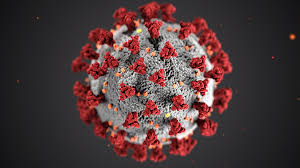
 <h1><center> COVID_19 Death Prediction</center></h1>

In [ ]:
#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the covid19 dataset and checking first 5 data
covid=pd.read_csv("corona.csv",parse_dates=["Date"])
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
#checking the last 5 rows of data
covid.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [4]:
#checking the shape of dataset 
covid.shape

(23688, 5)

In [5]:
#checking the columns in dataset
covid.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
covid.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [8]:
#checking for null values if any
covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [9]:
# spliting of date into day and month and year for the analysis during graph 
covid["month"]=covid["Date"].dt.month
covid["year"]=covid["Date"].dt.year
covid["date"]=covid["Date"].dt.day


In [10]:
covid

,Date,Country,Confirmed,Recovered,Deaths,month,year,date
0,2020-01-22,Afghanistan,0,0,0,1,2020,22
1,2020-01-22,Albania,0,0,0,1,2020,22
2,2020-01-22,Algeria,0,0,0,1,2020,22
3,2020-01-22,Andorra,0,0,0,1,2020,22
4,2020-01-22,Angola,0,0,0,1,2020,22
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,5,2020,26
23684,2020-05-26,Western Sahara,9,6,1,5,2020,26
23685,2020-05-26,Yemen,249,10,49,5,2020,26
23686,2020-05-26,Zambia,920,336,7,5,2020,26


# EDA

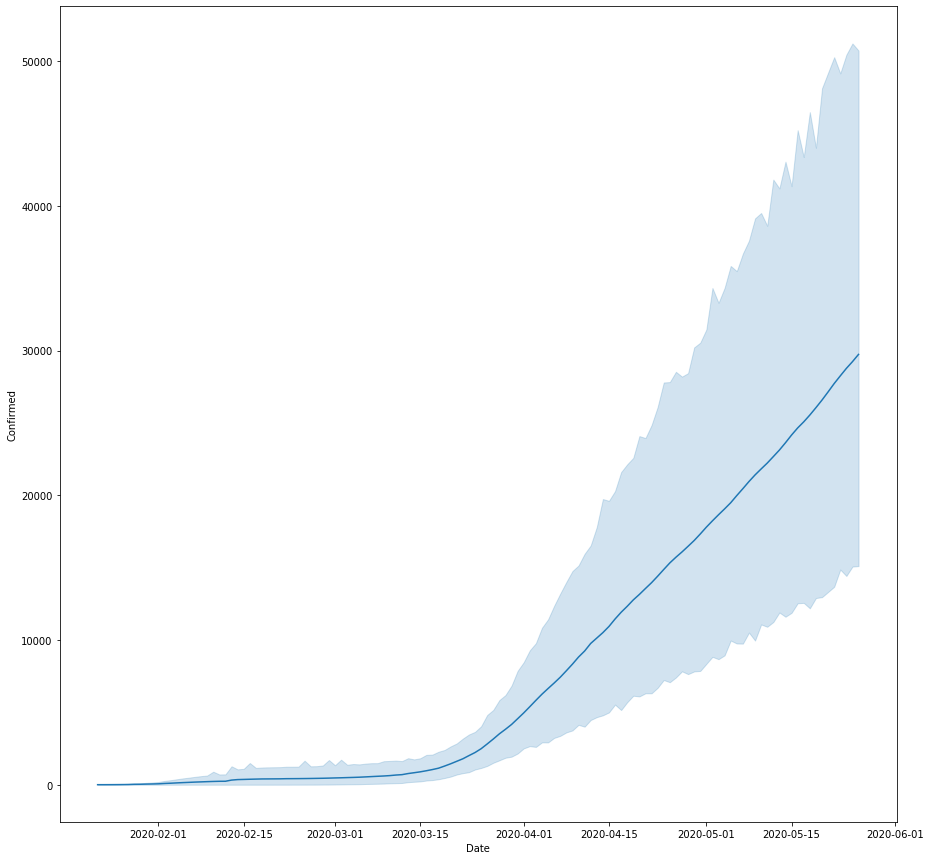

In [11]:
# plotting the graph to know the confiremed case trend with increase in date
plt.figure(figsize=(15,15))
sns.lineplot(x="Date",y="Confirmed",data=covid)
plt.show()

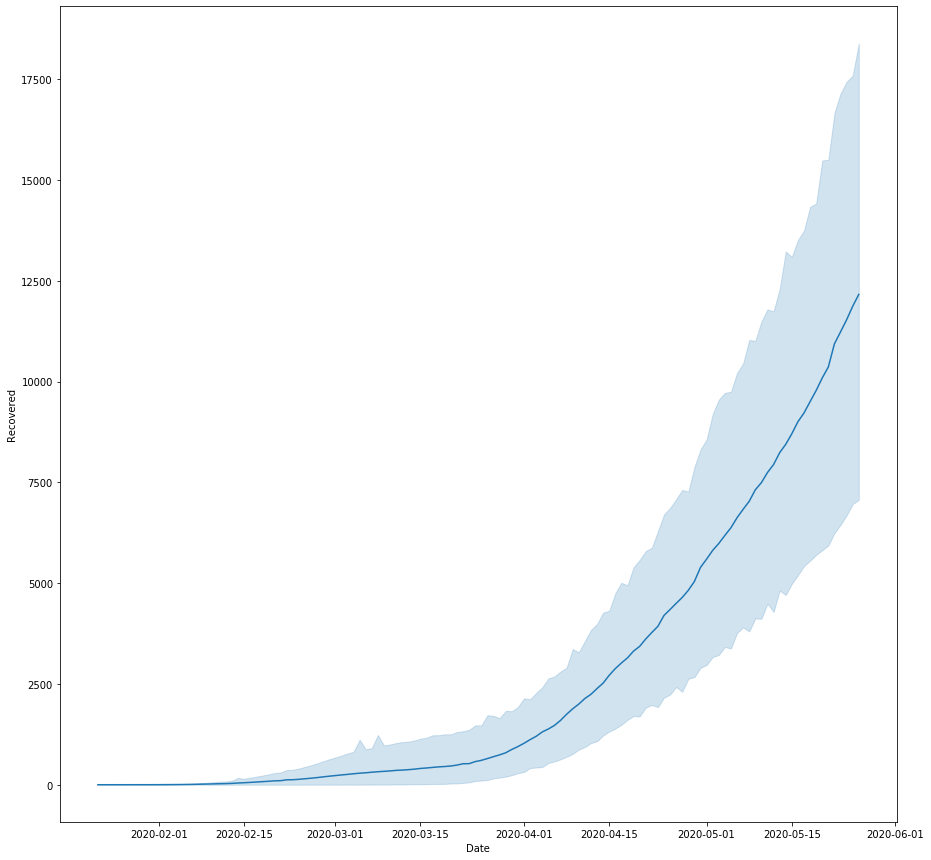

In [12]:
# plotting the graph to know the confiremed case trend with increase in date
plt.figure(figsize=(15,15))
sns.lineplot(x="Date",y="Recovered",data=covid)
plt.show()

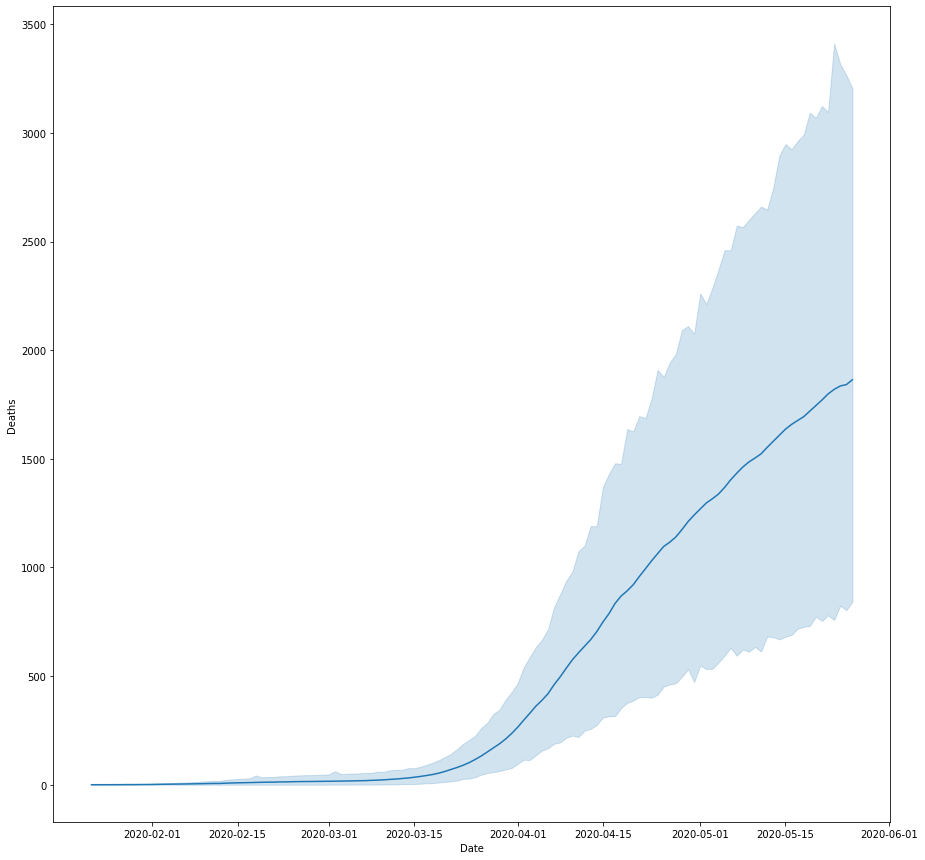

In [13]:
# plotting the graph to know the confiremed case trend with increase in date
#we can see in graph at start the death was zero but after some time it increases fast rate but at end the graph slightly towards 
# constant
plt.figure(figsize=(15,15))
sns.lineplot(x="Date",y="Deaths",data=covid)
plt.show()

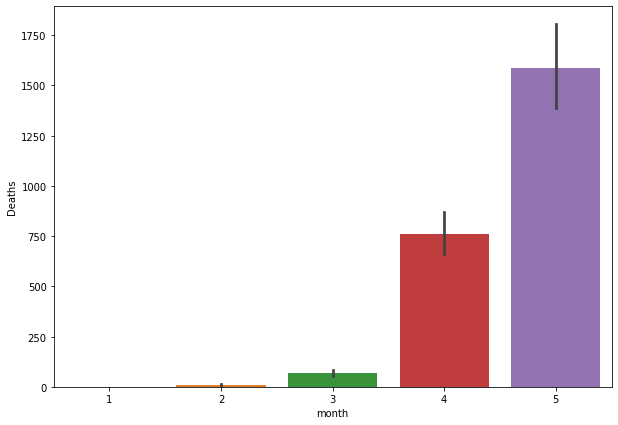

In [14]:
#plotting the bar plot month-wise to see the number of deaths in months and this also shows the increment of death with increase in time
plt.figure(figsize=(10,7))
sns.barplot(x="month",y="Deaths",data=covid)

In [15]:
#getting the total number of deaths,recovery,confirmed of different countries
data=covid.groupby(["Country"])["Deaths","Confirmed","Recovered"].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
data

,Deaths,Confirmed,Recovered
Country,,,
Afghanistan,4669,185236,20845
Albania,1629,41253,25688
Algeria,23232,240070,107345
Andorra,2219,41573,20751
Angola,131,1892,506
...,...,...,...
West Bank and Gaza,113,19971,8798
Western Sahara,1,307,186
Yemen,460,2696,92


In [17]:
#sorting the dataset in dcreasing order of death and we will check out the which country has the maximum number of deaths 
data=data.sort_values("Deaths",ascending=False)

In [18]:
#top 20 country with maximum of deaths
covid_top=data.head(20)

In [19]:
#This list tell us the US has the maximum number of deaths 
covid_top.reset_index(inplace=True)
covid_top

,Country,Deaths,Confirmed,Recovered
0,US,3221969,57098767,8428678
1,Italy,1568276,11896347,4354815
2,United Kingdom,1329006,9150537,43829
3,Spain,1302010,11890691,5770271
4,France,1209634,8746538,2519190
5,Brazil,438199,6701409,2666743
6,China,384657,8871610,6776464
7,Belgium,362702,2480956,587424
8,Iran,352960,5778865,3973261
9,Germany,319666,9046257,6102898


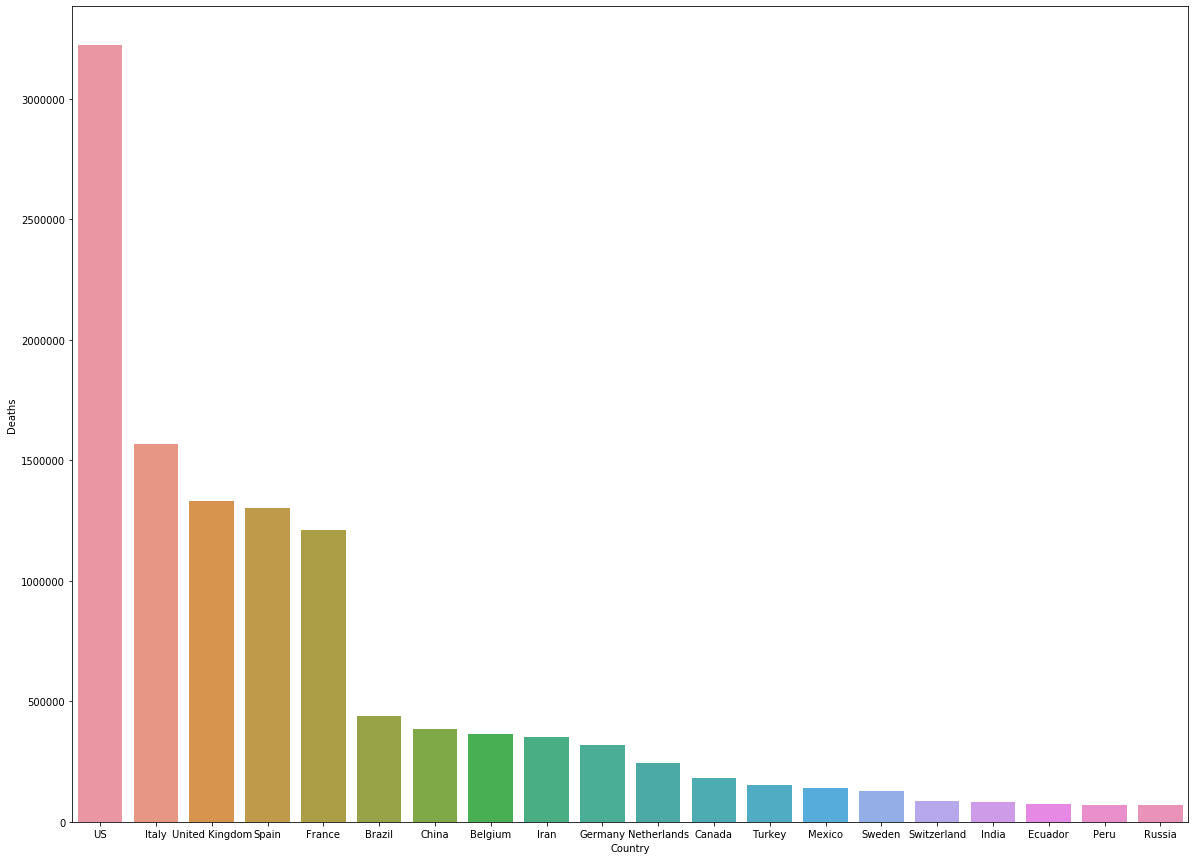

In [20]:
# plotting the bar graph of top 20 countries with number of deaths 
plt.figure(figsize=(20,15))
sns.barplot(x="Country",y="Deaths",data=covid_top)

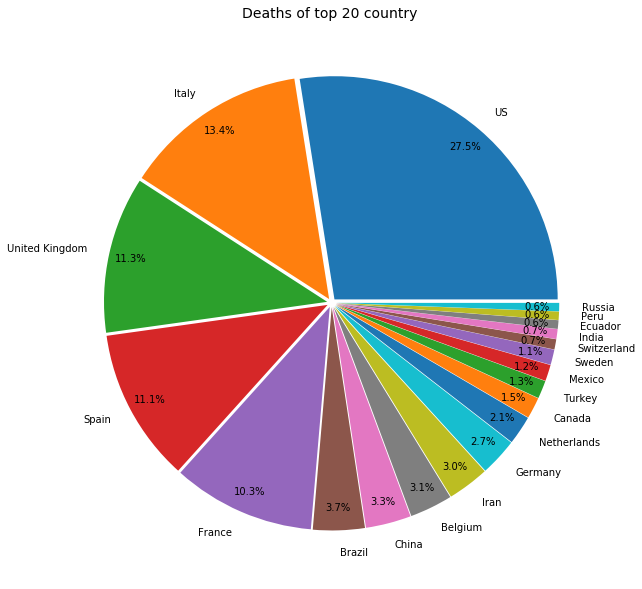

In [54]:
# using the pie the lets check the percenatge of death in top 20 country
pie, ax = plt.subplots(figsize=[10,20])
labels = covid_top["Country"]
plt.pie(x=covid_top["Deaths"], autopct="%.1f%%",explode=[0.02]*20, labels=labels, pctdistance=0.9)
plt.title("Deaths of top 20 country ", fontsize=14);

In [21]:
#total number of deaths in the world
data["Deaths"].sum()

12482037

In [22]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths,month,year,date
0,2020-01-22,Afghanistan,0,0,0,1,2020,22
1,2020-01-22,Albania,0,0,0,1,2020,22
2,2020-01-22,Algeria,0,0,0,1,2020,22
3,2020-01-22,Andorra,0,0,0,1,2020,22
4,2020-01-22,Angola,0,0,0,1,2020,22


In [23]:
covid=covid.set_index("Date")
covid.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26',
               '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26',
               '2020-05-26', '2020-05-26'],
              dtype='datetime64[ns]', name='Date', length=23688, freq=None)

In [24]:
y=covid["Deaths"].resample('D').sum()

In [25]:
y

Date
2020-01-22        17
2020-01-23        18
2020-01-24        26
2020-01-25        42
2020-01-26        56
               ...  
2020-05-22    338160
2020-05-23    342097
2020-05-24    345059
2020-05-25    346232
2020-05-26    350453
Freq: D, Name: Deaths, Length: 126, dtype: int64

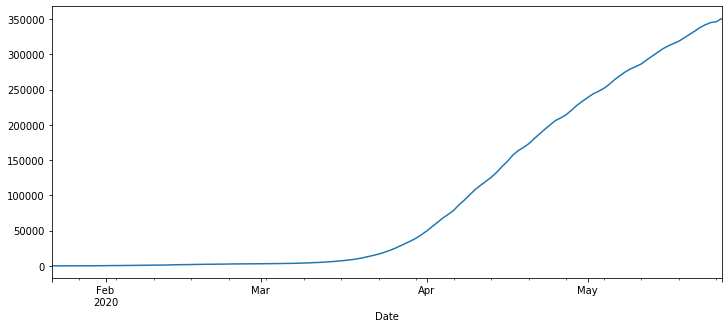

In [26]:
y.plot(figsize=(12,5))
plt.show()

In [27]:
#using the groupby in date to check deaths at everyday in world
Data=covid.groupby(["Date"])["Deaths"].sum()

In [28]:
Data=pd.DataFrame(Data)

In [29]:
Data.reset_index(inplace=True)

In [30]:
Data

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
121,2020-05-22,338160
122,2020-05-23,342097
123,2020-05-24,345059
124,2020-05-25,346232


In [31]:
#now we are creating a array of total number of days (2020-01-22 to 2020-05-26) 
total_dates=np.array(range(1,127))

In [32]:
total_dates=total_dates.reshape(-1,1)
total_dates.shape

(126, 1)

In [33]:
future_pred=total_dates+20

In [34]:
future_pred=future_pred.reshape(-1,1)
future_pred

array([[ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
       [ 81],
       [ 82],
       [ 83],
       [ 84],
       [ 85],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
      

In [35]:
#using for loop to sum up the current date deaths with the previous date deaths to get to total sum upto particular date
death_day=Data["Deaths"]
death_sum=[]
total=0
for i in range(len(death_day)):
    total=total+death_day[i]
    i=i+1
    death_sum.append(total)

In [36]:
death_sum=np.array(death_sum)

In [37]:
death_sum.shape

(126,)

In [38]:
y=death_sum


# Model training

In [39]:
# importing libraries and 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(total_dates,y,test_size=.22,shuffle=False)

In [40]:
#using SVR with poly as the graph is not linear an making predictions  
svm=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5)
svm.fit(x_train,y_train)
pred=svm.predict(future_pred)

MSE 324467222834.23474
MAE 441690.898326647
r2 score:  0.9620058217314584


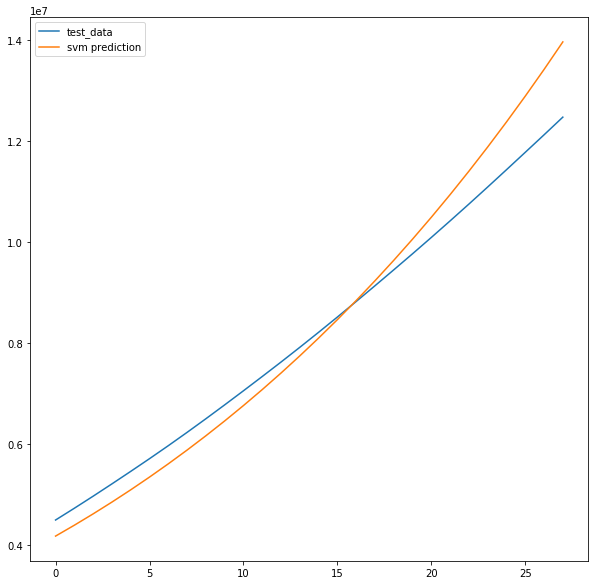

In [41]:
# plotting the graph with actual data(test data) and predicted data(svm data)
plt.figure(figsize=(10,10))
svm_tpred=svm.predict(x_test)
plt.plot(y_test)
plt.plot(svm_tpred)
plt.legend(['test_data','svm prediction'])
print("MSE",mean_squared_error(svm_tpred,y_test))
print("MAE",mean_absolute_error(svm_tpred,y_test))
print("r2 score: ",r2_score(svm_tpred,y_test))

In [60]:
import joblib
joblib.dump(svm,"svm.covid_19.pkl")

['svm.covid_19.pkl']